In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../../CSV/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop("PassengerId",axis=1,inplace=True)

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,682,NaN,147,3
top,NaN,NaN,"Gaskell, Mr. Alfred",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [10]:
df.drop("Cabin",axis=1,inplace=True)

In [11]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df["Embarked"].fillna("S",inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [14]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [15]:
df.drop("Ticket",axis=1,inplace=True)

In [16]:
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Gaskell, Mr. Alfred",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN


<h5>Label Encoding</h5>

In [17]:
cat_df = df.select_dtypes("object")
num_df = df.select_dtypes(["float64","int64"])

In [18]:
cat_df.head()

,Name,Sex,Embarked
0,"Braund, Mr. Owen Harris",male,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C
2,"Heikkinen, Miss. Laina",female,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S
4,"Allen, Mr. William Henry",male,S


In [19]:
num_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for col in cat_df:
    le = LabelEncoder()
    cat_df[col] = le.fit_transform(cat_df[col])

In [22]:
cat_df.head()

,Name,Sex,Embarked
0,108,1,2
1,190,0,0
2,353,0,2
3,272,0,2
4,15,1,2


In [23]:
df = pd.concat([num_df,cat_df],axis=1)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Embarked
0,0,3,22.0,1,0,7.2500,108,1,2
1,1,1,38.0,1,0,71.2833,190,0,0
2,1,3,26.0,0,0,7.9250,353,0,2
3,1,1,35.0,1,0,53.1000,272,0,2
4,0,3,35.0,0,0,8.0500,15,1,2


<h5>EDA<h5>

In [25]:
cat_col = ["Sex","Embarked"]

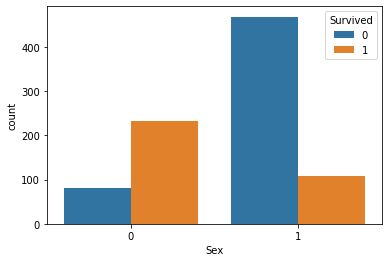

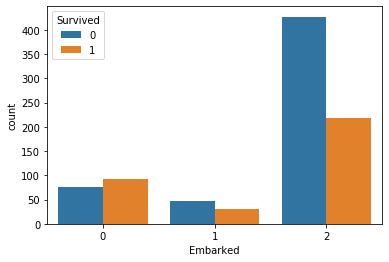

In [394]:
for col in cat_col:
    plt.figure()
    sns.countplot(data=df,x=col,hue="Survived")
    plt.show()

In [395]:
num_col = ("Pclass,Name,Age,SibSp,Parch,Fare").split(",")

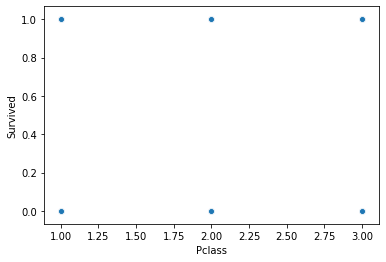

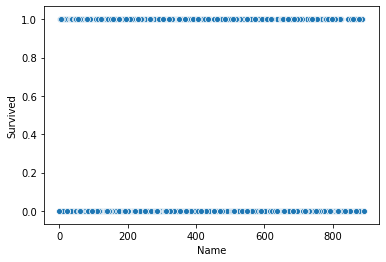

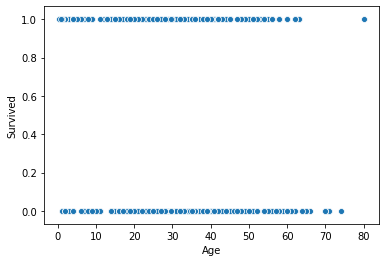

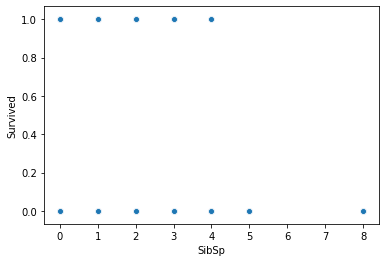

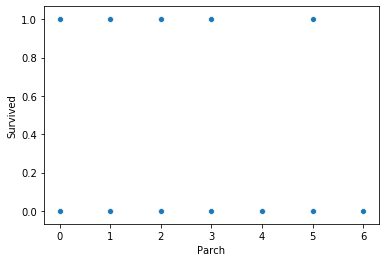

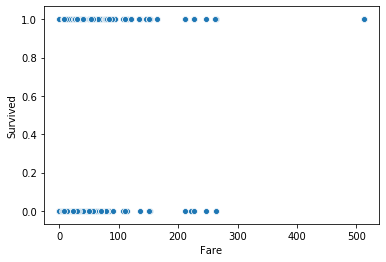

In [396]:
for col in num_col:
    plt.figure()
    sns.scatterplot(data=df,x=col,y="Survived")
    plt.show()

### Baseline model

In [26]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [27]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Embarked
0,3,22.0,1,0,7.2500,108,1,2
1,1,38.0,1,0,71.2833,190,0,0
2,3,26.0,0,0,7.9250,353,0,2
3,1,35.0,1,0,53.1000,272,0,2
4,3,35.0,0,0,8.0500,15,1,2


In [28]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
def create_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [31]:
log = LogisticRegression()

In [32]:
create_model(log)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       153
           1       0.78      0.65      0.71       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Decision Tree

In [33]:
dt1 = DecisionTreeClassifier()

In [34]:
dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       153
           1       0.69      0.66      0.68       115

    accuracy                           0.73       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268



In [35]:
# Training score
dt1.score(X_train,y_train)

1.0

In [36]:
# Important features
dt1.feature_importances_

array([0.10379032, 0.14805678, 0.04275812, 0.00346527, 0.13962436,
       0.21494359, 0.32100818, 0.02635337])

In [37]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name', 'Sex', 'Embarked'], dtype='object')

### Purning

In [38]:
dt1.get_depth()

18

In [40]:
dt2 = DecisionTreeClassifier(max_depth=8)
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [41]:
dt3 = DecisionTreeClassifier(min_samples_leaf=40)
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       153
           1       0.86      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.80      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268



In [42]:
dt4 = DecisionTreeClassifier(min_samples_leaf=40,criterion="entropy")
dt4 = create_model(dt4)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       153
           1       0.75      0.66      0.70       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



### Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

In [75]:
m1 = cross_val_score(dt2,X,y,cv=4)

In [76]:
m1

array([0.78125   , 0.83856502, 0.81531532, 0.77477477])

In [77]:
m1.mean()

0.8024762781279037

In [78]:
m2 = cross_val_score(dt3,X,y,cv=4)

In [79]:
m2

array([0.77232143, 0.81165919, 0.7972973 , 0.8018018 ])

In [80]:
m2.mean()

0.7957699301239101

In [81]:
m3 = cross_val_score(dt4,X,y,cv=4)

In [82]:
m3

array([0.75      , 0.81165919, 0.7972973 , 0.8018018 ])

In [83]:
m3.mean()

0.7901895729810529